In [19]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.style
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
mpl.style.use('ggplot')
print(mpl.style.available)

lmaxs = np.array([2**n-1 for n in np.arange(11,13)])
lmaxs = np.array([32*n-1 for n in np.arange(1,150,10)])
lmaxs = np.array([256*n-1 for n in np.arange(1,20)])
blacklist_CPU, blacklist_GPU = [], []

for backends in [['CPU'],['GPU']]:
    if backends == ['GPU']: # "FFTshift"
        popstrings =    ["setup", "rotation"] + \
                        [ "Type conversion"] + \
                        ["nuFFT init",] + \
                        ["spin-1 synth", "gclm2lenmap"] + \
                        ["Transfers ->", "Transfer <-"] + \
                        ["dlm2pointing", "dlm2pointing - dlm scaling", "dlm2pointing - allocation"]# +\
                        
        solvers = ['cufinufft']
        data = []
        for lmax in lmaxs:
            fn = '/mnt/home/sbelkner/git/pySHT/test/benchmark/timings/{backends}_{solver}_{lmax}'.format(backends=backends[0], solver=solvers[0], lmax=lmax)
            # print(fn)
            if os.path.isfile(fn):
                with open(fn, "r") as file:
                    data.append(json.load(file))
            else:
                blacklist_GPU.append(lmax)
        for popstring in popstrings:
            if popstring in data[0]:
                data[0].pop(popstring)
        keys_GPU = data[0].keys()
        data_across_l = {}
        for d in data:
            for keyi, key in enumerate(keys_GPU):
                if key in data_across_l:
                    data_across_l[key].append(d[key])
                else:
                    data_across_l[key] = [d[key]]
        resGPU = np.array([v for k, v in data_across_l.items()])           
    else:
        popstrings =    ["setup", "rotation"] +\
                        ["spin-1 maps", "dlm2pointing"] #+\
                        # ["pointing"]
        backend = ['CPU']
        solvers = ['duccnufft'] # duccnufft lenspyx
        d = []
        
        data = []
        for lmax in lmaxs:
            fn = '/mnt/home/sbelkner/git/pySHT/test/benchmark/timings/{backends}_{solver}_{lmax}'.format(backends=backends[0], solver=solvers[0], lmax=lmax)
            # print(fn)
            if os.path.isfile(fn):
                with open(fn, "r") as file:
                    data.append(json.load(file))
            else:
                blacklist_CPU.append(lmax)
        for popstring in popstrings:
            if popstring in data[0]:
                data[0].pop(popstring)
        keys_CPU = data[0].keys()
        data_across_l = {}
        for d in data:
            for keyi, key in enumerate(keys_CPU):
                if key in data_across_l:
                    data_across_l[key].append(d[key])
                else:
                    data_across_l[key] = [d[key]]
        resCPU = np.array([v for k, v in data_across_l.items()]) 
        
blacklist_CPU, blacklist_GPU

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


([], [3327, 4863])

In [20]:
lmaxs_CPU = np.array([l for l in lmaxs if l not in blacklist_CPU])
lmaxs_GPU = np.array([l for l in lmaxs if l not in blacklist_GPU])
lmaxs_CPU, lmaxs_GPU

(array([ 255,  511,  767, 1023, 1279, 1535, 1791, 2047, 2303, 2559, 2815,
        3071, 3327, 3583, 3839, 4095, 4351, 4607, 4863]),
 array([ 255,  511,  767, 1023, 1279, 1535, 1791, 2047, 2303, 2559, 2815,
        3071, 3583, 3839, 4095, 4351, 4607]))

Text(0.5, 0, 'lmax')

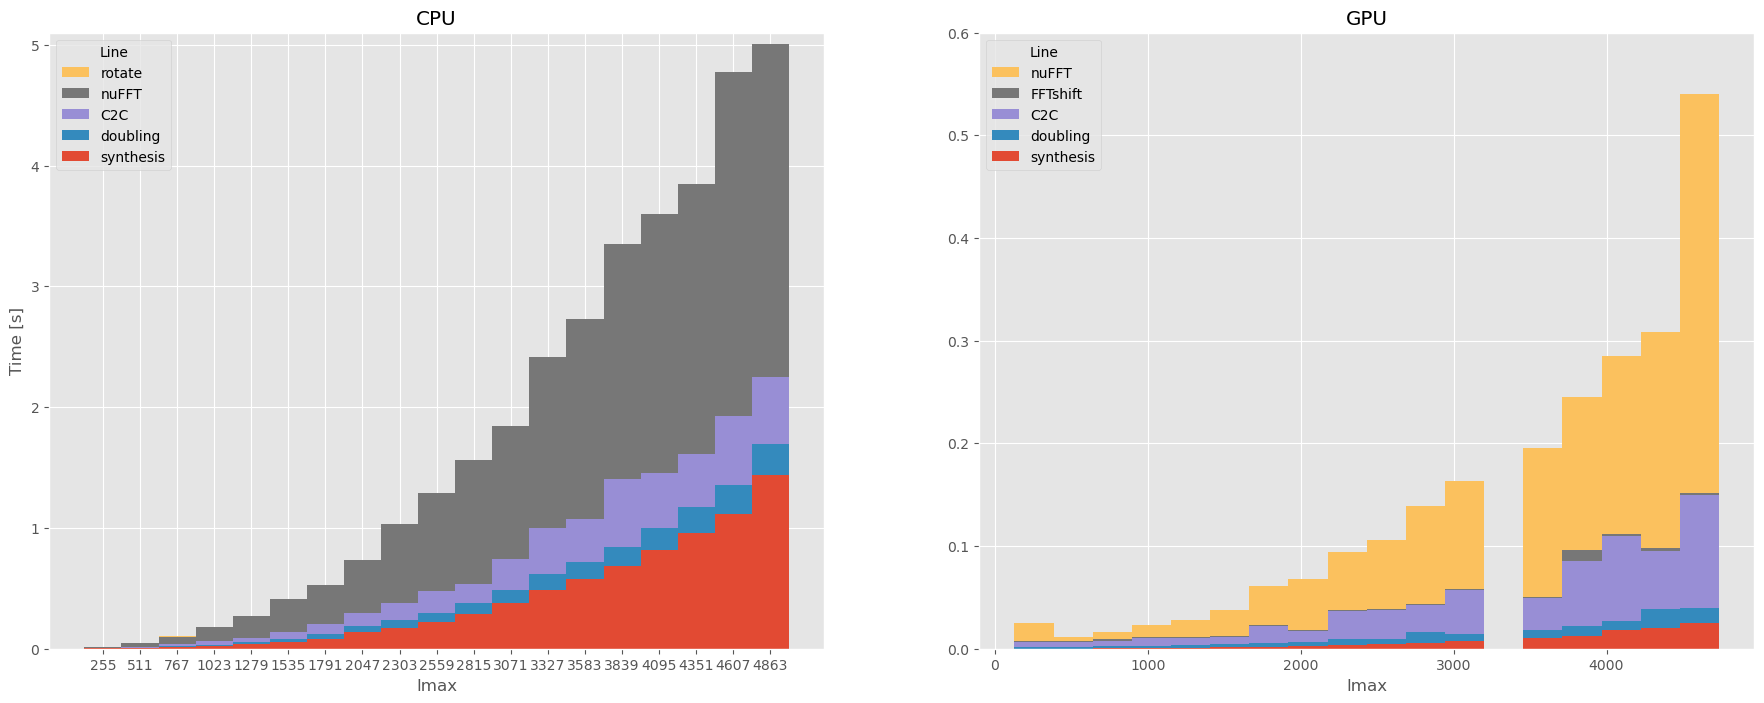

In [21]:
fig, ax = plt.subplots(1,2,figsize=(22,8), sharey=False)
bottom = np.zeros(shape=(len(lmaxs_CPU)))
# lmaxs.astype(str)
for rowi, row in enumerate(resCPU): #[:-1,:]
    # if rowi == 0:
        # ax[0].bar(lmaxs.astype(str), [0,0], 1, align='center', bottom=bottom, label='_')    
    ax[0].bar(lmaxs_CPU.astype(str), row, 1, align='center', bottom=bottom, label=list(keys_CPU)[rowi])
    bottom+=row
ax[0].legend()
ax[0].set_title("CPU")
ax[0].set_ylim(0.0, 5.1)
handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(handles[::-1], labels[::-1], title='Line', loc='upper left')

bottom = 0
bottom = np.zeros(shape=(len(lmaxs_GPU)))
# for rowi, row in enumerate(np.roll(resGPU,-1,axis=0)): #[:-1,:]
for rowi, row in enumerate(resGPU): #[:-1,:]
    ax[1].bar(lmaxs_GPU, row, 256, align='center', bottom=bottom, label=list(keys_GPU)[rowi])
    bottom+=row
ax[1].legend()
ax[1].set_title("GPU")
ax[1].set_ylim(0.0, 0.6)
handles, labels = ax[1].get_legend_handles_labels()
ax[1].legend(handles[::-1], labels[::-1], title='Line', loc='upper left')
ax[0].set_xlabel("lmax")
ax[0].set_ylabel("Time [s]")
ax[1].set_xlabel("lmax")


# bottom = 0
# # for rowi, row in enumerate(np.roll(resGPU,-1,axis=0)): #[:-1,:]
# for rowi, (rowG,rowC) in enumerate(zip(resGPU,resCPU)): #[:-1,:]
#     ax[2].bar(lmaxs_GPU.astype(str), rowC/rowG, 1, align='center', bottom=bottom, label=list(keys_GPU)[rowi])
#     bottom+=row
# # ax[2].legend()
# ax[2].set_title("GPU")
# ax[2].set_ylim(0.0, 0.55)
# handles, labels = ax[1].get_legend_handles_labels()

In [21]:
resCPU[3]/resCPU[0], resGPU[1]/resGPU[2], resCPU[3]/resGPU[1], resCPU[0]/resGPU[2]

(array([2.56211022, 2.72384167]),
 array([3.04827656, 2.75220372]),
 array([40.87254092, 48.46404051]),
 array([48.62819996, 48.96867325]))